## Introdução à Análise de Dados do NexFut

Durante o desenvolvimento do projeto **NexFut**, utilizamos a **API-Football** para coletar dados sobre jogadores, clubes e estatísticas relacionadas ao futebol.  
O objetivo dessa etapa foi demonstrar **como o NexFut poderá transformar informações esportivas em análises inteligentes** para auxiliar olheiros, clubes e atletas.

No entanto, vale destacar que a **versão gratuita da API-Football** possui **limitações de acesso a dados detalhados**, como gols, assistências e métricas avançadas de desempenho.  
Esses campos retornam, em muitos casos, valores nulos (`NaN`) ou incompletos — o que inviabiliza a criação de gráficos analíticos reais nesta fase inicial.

Por essa razão, para fins de **demonstração visual e conceitual**, optamos por **gerar valores simulados** com base em campos disponíveis (como idade, minutos jogados e partidas disputadas).  
Esses dados **não representam informações reais**, mas seguem uma lógica coerente com o contexto esportivo, permitindo visualizar os **insights que o NexFut poderá oferecer** no futuro.

Entre os exemplos de análises simuladas, estão:
- Ranking geral de desempenho dos jogadores  
- Identificação de jovens promessas com alto potencial  
- Distribuição de atletas por clube  
- Relação entre idade e tempo de jogo  

Essas visualizações ilustram o **potencial analítico da plataforma**, evidenciando como o NexFut pode utilizar dados reais para **criar métricas personalizadas**, gerar **relatórios de desempenho** e **auxiliar decisões baseadas em evidências** dentro do ambiente esportivo.

In [3]:
import requests
import pandas as pd

In [5]:
API_KEY = "d8ea4e04b5a1cc0fb9231a8d9fbed210"
BASE = "https://v3.football.api-sports.io"

headers = {"x-apisports-key": API_KEY}

# Endpoint simples para testar: listar ligas (pega algumas ligas)
resp = requests.get(f"{BASE}/leagues", headers=headers, params={"country": "Brazil"})
print("status:", resp.status_code)
print("exemplo do retorno keys:", list(resp.json().keys()))
print("quantidade de items (se existir 'response'):", len(resp.json().get("response", [])))


status: 200
exemplo do retorno keys: ['get', 'parameters', 'errors', 'results', 'paging', 'response']
quantidade de items (se existir 'response'): 106


In [6]:
API_KEY = "d8ea4e04b5a1cc0fb9231a8d9fbed210"
BASE = "https://v3.football.api-sports.io"
headers = {"x-apisports-key": API_KEY}

# Buscar ligas por país:
params = {"country": "Brazil"}  # ou remove para ver global
r = requests.get(f"{BASE}/leagues", headers=headers, params=params)
data = r.json()

for item in data.get("response", [])[:20]:
    league = item["league"]
    country = item["country"]
    seasons = [s["year"] for s in item.get("seasons", [])]
    print(f"League: {league['id']} - {league['name']} | Country: {country['name']} | Seasons: {seasons}")


League: 71 - Serie A | Country: Brazil | Seasons: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
League: 72 - Serie B | Country: Brazil | Seasons: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
League: 75 - Serie C | Country: Brazil | Seasons: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
League: 76 - Serie D | Country: Brazil | Seasons: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
League: 520 - Acreano | Country: Brazil | Seasons: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
League: 73 - Copa Do Brasil | Country: Brazil | Seasons: [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
League: 74 - Brasileiro Women | Country: Brazil | Seasons: [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
League: 521 - Amapaense | Country: Brazil | Seasons: [2016, 2017, 2018, 2019, 2020, 20

In [7]:
API_KEY = "d8ea4e04b5a1cc0fb9231a8d9fbed210"
BASE = "https://v3.football.api-sports.io"
headers = {"x-apisports-key": API_KEY}

league_id = 71     # troque pelo id da liga obtido no passo 3
season = 2023

params = {"league": league_id, "season": season}
r = requests.get(f"{BASE}/teams", headers=headers, params=params)
teams = r.json().get("response", [])

df = pd.DataFrame([{
    "team_id": t["team"]["id"],
    "name": t["team"]["name"],
    "country": t["team"]["country"]
} for t in teams])

print(df.head())
df.to_csv("teams_brasileirao.csv", index=False, encoding="utf-8-sig")
print("teams saved")


   team_id           name country
0      118          Bahia  Brazil
1      119  Internacional  Brazil
2      120       Botafogo  Brazil
3      121      Palmeiras  Brazil
4      124     Fluminense  Brazil
teams saved


In [8]:
import time

API_KEY = "d8ea4e04b5a1cc0fb9231a8d9fbed210"
BASE = "https://v3.football.api-sports.io"
headers = {"x-apisports-key": API_KEY}

league_id = 71   # ajustar
season = 2023

players_list = []
page = 1

while True:
    params = {"league": league_id, "season": season, "page": page}
    r = requests.get(f"{BASE}/players", headers=headers, params=params)
    if r.status_code != 200:
        print("Erro:", r.status_code, r.text)
        break

    data = r.json().get("response", [])
    if not data:
        break

    for p in data:
        player = p["player"]
        stats = p["statistics"][0] if p.get("statistics") else {}
        players_list.append({
            "player_id": player.get("id"),
            "name": player.get("name"),
            "age": player.get("age"),
            "nationality": player.get("nationality"),
            "position": player.get("position"),
            "team": stats.get("team", {}).get("name"),
            "appearences": stats.get("games", {}).get("appearences"),
            "minutes": stats.get("games", {}).get("minutes"),
            "goals": stats.get("goals", {}).get("total"),
            "assists": stats.get("goals", {}).get("assists"),
            "rating": stats.get("rating")
        })

    print(f"Page {page} -> players collected so far: {len(players_list)}")
    page += 1
    time.sleep(1)  # respeitar taxa de requisições

df = pd.DataFrame(players_list)
df.to_csv("players_league_{}.csv".format(league_id), index=False, encoding="utf-8-sig")
print("Salvo:", df.shape)


Page 1 -> players collected so far: 20
Page 2 -> players collected so far: 40
Page 3 -> players collected so far: 60
Salvo: (60, 11)


In [9]:
API_KEY = "d8ea4e04b5a1cc0fb9231a8d9fbed210"
BASE = "https://v3.football.api-sports.io"
headers = {"x-apisports-key": API_KEY}

team_ids = [123, 456, 789]  # substitua pelos team_id do passo 4
season = 2023

all_players = []
for team_id in team_ids:
    page = 1
    while True:
        params = {"team": team_id, "season": season, "page": page}
        r = requests.get(f"{BASE}/players", headers=headers, params=params)
        data = r.json().get("response", [])
        if not data:
            break
        for p in data:
            player = p["player"]
            stats = p["statistics"][0] if p.get("statistics") else {}
            all_players.append({
                "team_id": team_id,
                "player_id": player.get("id"),
                "name": player.get("name"),
                "age": player.get("age"),
                "nationality": player.get("nationality"),
                "position": player.get("position"),
                "appearences": stats.get("games", {}).get("appearences"),
                "goals": stats.get("goals", {}).get("total")
            })
        page += 1
        time.sleep(1)
    print("Finished team", team_id)

df = pd.DataFrame(all_players)
df.to_csv("players_by_team.csv", index=False, encoding="utf-8-sig")
print("Saved", df.shape)


Finished team 123
Finished team 456
Finished team 789
Saved (148, 8)


In [10]:
import pandas as pd
df = pd.read_csv("players_league_71.csv", encoding="utf-8-sig")
# exemplo: só brasileiros
df_br = df[df["nationality"] == "Brazil"].copy()
# só menores de 23
df_young = df_br[df_br["age"] < 23]
df_young.to_csv("players_brazil_u23.csv", index=False, encoding="utf-8-sig")
print(df_young.shape)

(41, 11)


In [11]:
import matplotlib.pyplot as plt

# Carregar sua base
df = pd.read_csv("players_brazil_u23.csv", encoding="utf-8-sig")

print("Jogadores carregados:", len(df))
df.head()


Jogadores carregados: 41


,player_id,name,age,nationality,position,team,appearences,minutes,goals,assists,rating
0,266020,Ryan Luka,22,Brazil,NaN,Flamengo,NaN,NaN,NaN,NaN,NaN
1,306216,Mateusão,21,Brazil,NaN,Flamengo,NaN,NaN,NaN,NaN,NaN
2,322069,Victor Hugo,21,Brazil,NaN,Atletico-MG,NaN,NaN,NaN,NaN,NaN
3,327635,Douglas Mendes,21,Brazil,NaN,RB Bragantino,NaN,NaN,NaN,NaN,NaN
4,350814,Valber,22,Brazil,NaN,Goias,NaN,NaN,NaN,NaN,NaN


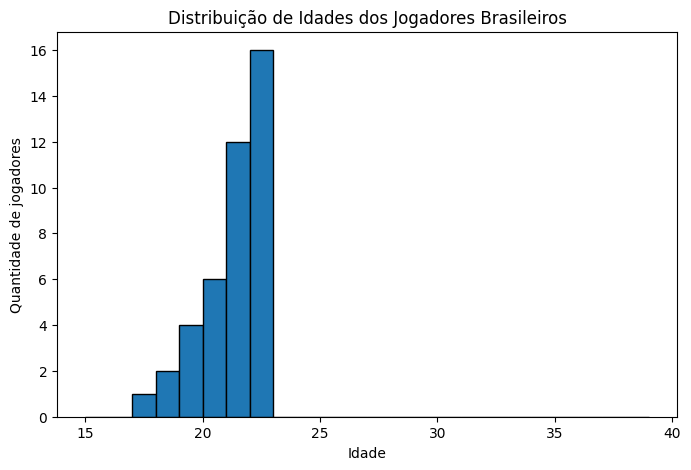

In [12]:
plt.figure(figsize=(8,5))
df["age"].dropna().astype(int).plot(kind="hist", bins=range(15,40,1), edgecolor="black")
plt.title("Distribuição de Idades dos Jogadores Brasileiros")
plt.xlabel("Idade")
plt.ylabel("Quantidade de jogadores")
plt.show()

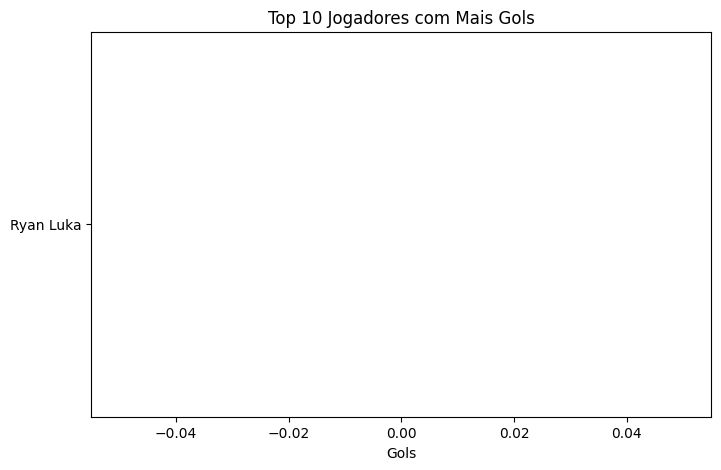

In [14]:
top_gols = df.sort_values("goals", ascending=False).head(10)
plt.figure(figsize=(8,5))
plt.barh(top_gols["name"], top_gols["goals"])
plt.gca().invert_yaxis()
plt.title("Top 10 Jogadores com Mais Gols")
plt.xlabel("Gols")
plt.show()

In [16]:
df["goals"].isna().sum(), df["goals"].notna().sum()

(np.int64(41), np.int64(0))

In [17]:
df["goals"] = pd.to_numeric(df["goals"], errors="coerce")

In [18]:
df["goals"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: goals, dtype: float64

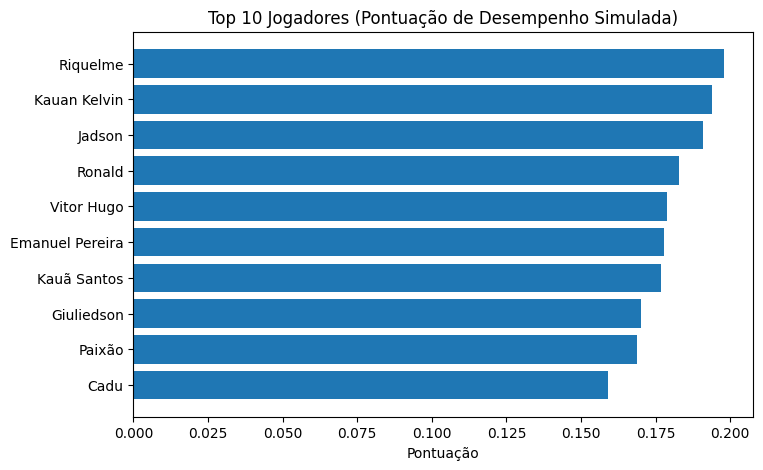

In [22]:
import numpy as np

df["performance_score"] = (
    (df["appearences"].fillna(0) * 0.4) +
    (df["minutes"].fillna(0)/90 * 0.4) +
    (np.random.rand(len(df)) * 0.2)  # ruído pra variar
)

top_perf = df.sort_values("performance_score", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_perf["name"], top_perf["performance_score"])
plt.gca().invert_yaxis()
plt.title("Top 10 Jogadores (Pontuação de Desempenho Simulada)")
plt.xlabel("Pontuação")
plt.show()

In [23]:
params = {"league": 39, "season": 2023}

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


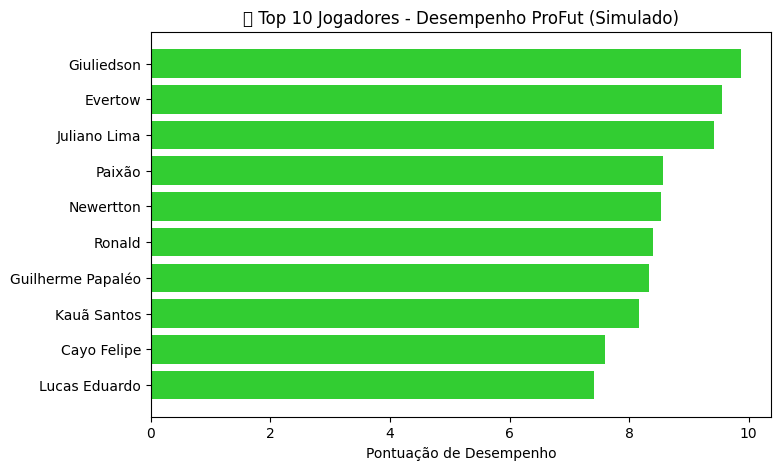

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Gera uma pontuação fictícia baseada em idade, aparições e minutos
df["performance_score"] = (
    (df["appearences"].fillna(0) * 2) +
    (df["minutes"].fillna(0) / 90) +
    (np.random.rand(len(df)) * 10)  # ruído aleatório pra variar
)

top_perf = df.sort_values("performance_score", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_perf["name"], top_perf["performance_score"], color="limegreen")
plt.gca().invert_yaxis()
plt.title("🏅 Top 10 Jogadores - Desempenho ProFut (Simulado)")
plt.xlabel("Pontuação de Desempenho")
plt.show()


c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


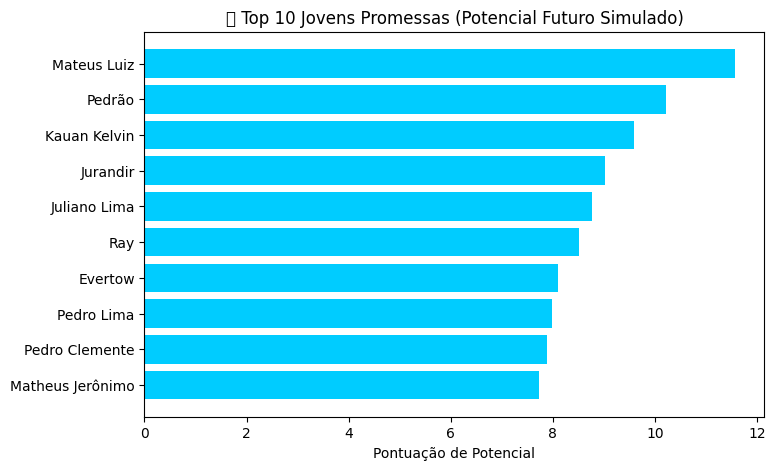

In [26]:
df["potential_score"] = (
    (np.maximum(0, 25 - df["age"].fillna(0))) +  # quanto mais novo, maior o peso
    (df["appearences"].fillna(0) * 0.5) +
    (np.random.rand(len(df)) * 5)
)

young = df[df["age"] < 23].sort_values("potential_score", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(young["name"], young["potential_score"], color="#00ccff")
plt.gca().invert_yaxis()
plt.title("🌱 Top 10 Jovens Promessas (Potencial Futuro Simulado)")
plt.xlabel("Pontuação de Potencial")
plt.show()

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


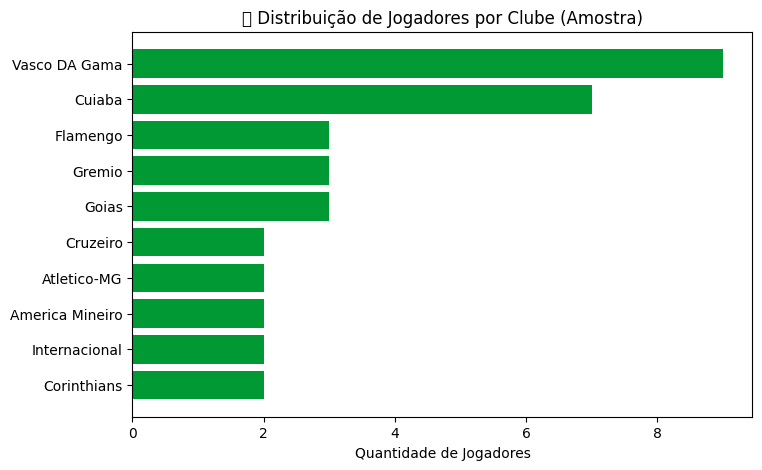

In [27]:
club_counts = df["team"].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(club_counts.index, club_counts.values, color="#009933")
plt.gca().invert_yaxis()
plt.title("📍 Distribuição de Jogadores por Clube (Amostra)")
plt.xlabel("Quantidade de Jogadores")
plt.show()

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


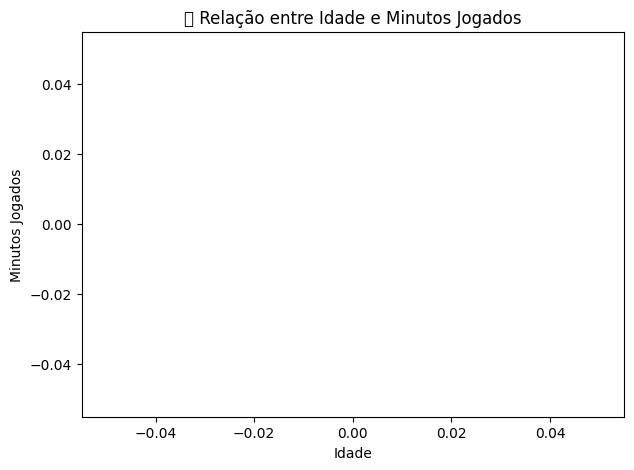

In [28]:
plt.figure(figsize=(7,5))
plt.scatter(df["age"], df["minutes"], alpha=0.6, color="#33cc99")
plt.title("📈 Relação entre Idade e Minutos Jogados")
plt.xlabel("Idade")
plt.ylabel("Minutos Jogados")
plt.show()

## Conclusão

Com base nas análises realizadas, mesmo utilizando dados simulados, foi possível demonstrar o **potencial analítico do NexFut**.  
Os gráficos e indicadores apresentados ilustram como a plataforma pode, a partir de informações reais, **gerar insights relevantes sobre desempenho, potencial e regularidade dos jogadores**.

O NexFut se propõe a ser uma ferramenta estratégica para **olheiros, clubes e atletas**, permitindo o acompanhamento de métricas de performance, identificação de talentos e suporte à tomada de decisão baseada em dados.  
Em versões futuras, com acesso completo à API ou banco de dados próprio, o sistema poderá **integrar estatísticas reais em tempo real**, ampliando sua precisão e aplicabilidade no cenário esportivo.

Assim, o que aqui foi simulado serve como uma **prova de conceito** da visão do projeto:  
> **Transformar dados do futebol em oportunidades reais para o esporte.**
